In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/students_medium_dirty.csv")


In [4]:
df.head()


,student_id,name,gender,class,math,english,science,attendance,study_hours
0,1,Student_1,Female,B,68.158169,81.750727,89.301456,NaN,NaN
1,2,Student_2,F,NaN,79.733399,49.431699,56.107270,74.0,5.0
2,3,Student_3,male,NaN,81.704127,73.718585,86.416542,100.0,2.0
3,4,Student_4,F,A,72.266199,83.739516,69.648543,85.0,6.0
4,5,Student_5,F,B,51.524038,NaN,43.063306,66.0,8.0


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   305 non-null    int64  
 1   name         305 non-null    object 
 2   gender       305 non-null    object 
 3   class        270 non-null    object 
 4   math         295 non-null    float64
 5   english      295 non-null    float64
 6   science      295 non-null    float64
 7   attendance   295 non-null    float64
 8   study_hours  296 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.6+ KB
None


In [6]:
print(df["gender"].unique)


<bound method Series.unique of 0      Female
1           F
2        male
3           F
4           F
        ...  
300    female
301      Male
302      male
303         F
304      male
Name: gender, Length: 305, dtype: object>


In [7]:
 df["gender"] = df["gender"].replace({
  "m": "Male", "male": "Male",
  "F": "Female", "female": "Female" 
 })

In [8]:
df["math"] = df["math"].fillna(df["math"].median())
df["english"] = df["english"].fillna(df["english"].median())
df["science"] = df["science"].fillna(df["science"].median())
df["attendance"] = df["attendance"].fillna(df["attendance"].median())
df["study_hours"] = df["study_hours"].fillna(df["study_hours"].median())
df["class"] = df["class"].fillna("Unknown")


In [9]:
df = df[(df["math"] >= 0) & (df["math"] <= 100)]
df = df[(df["english"] >= 0) & (df["english"] <= 100)]
df = df[(df["science"] >= 0) & (df["science"] <= 100)]
df = df[(df["attendance"] >= 0) & (df["attendance"] <= 100)]
df = df[(df["study_hours"] >= 0) & (df["study_hours"] <= 12)]



In [10]:
df.drop_duplicates


<bound method DataFrame.drop_duplicates of      student_id         name  gender    class       math    english  \
0             1    Student_1  Female        B  68.158169  81.750727   
1             2    Student_2  Female  Unknown  79.733399  49.431699   
2             3    Student_3    Male  Unknown  81.704127  73.718585   
3             4    Student_4  Female        A  72.266199  83.739516   
4             5    Student_5  Female        B  51.524038  72.763413   
..          ...          ...     ...      ...        ...        ...   
299         300  Student_300    Male        A  72.235081  70.923652   
301         267  Student_267    Male        B  71.647794  58.041354   
302         153  Student_153    Male        C  58.780450  52.904226   
303          10   Student_10  Female        A  69.793331  61.193605   
304         234  Student_234    Male        A  62.569161  67.213290   

       science  attendance  study_hours  
0    89.301456        74.0          5.0  
1    56.107270      

In [11]:
df.head()


,student_id,name,gender,class,math,english,science,attendance,study_hours
0,1,Student_1,Female,B,68.158169,81.750727,89.301456,74.0,5.0
1,2,Student_2,Female,Unknown,79.733399,49.431699,56.107270,74.0,5.0
2,3,Student_3,Male,Unknown,81.704127,73.718585,86.416542,100.0,2.0
3,4,Student_4,Female,A,72.266199,83.739516,69.648543,85.0,6.0
4,5,Student_5,Female,B,51.524038,72.763413,43.063306,66.0,8.0


In [13]:
avg_math = df["math"].mean()
avg_english = df["english"].mean()
avg_science = df["science"].mean()
avg_attendance = df["attendance"].mean()
print("Avg math:", avg_math)
print("Avg english:",avg_english)
print("Avg science", avg_science)
print("Avg Attendance:", avg_attendance)

Avg math: 69.6039897608144
Avg english: 72.2098447617485
Avg science 66.90564925402064
Avg Attendance: 73.86614173228347


In [14]:
top_math = df.loc[df["math"].idxmax()]
low_math = df.loc[df["math"].idxmin()]
print("Top Math Student:", top_math["name"],top_math["math"])
print("Lowest Math Student:", low_math["name"],low_math["math"])

Top Math Student: Student_218 99.98975809374708
Lowest Math Student: Student_286 16.47692050960177


In [15]:
corr = df[["attendance","math","english","science"]].corr()
print(corr)

            attendance      math   english   science
attendance    1.000000  0.022730 -0.104887 -0.142406
math          0.022730  1.000000  0.002785 -0.032085
english      -0.104887  0.002785  1.000000 -0.000076
science      -0.142406 -0.032085 -0.000076  1.000000


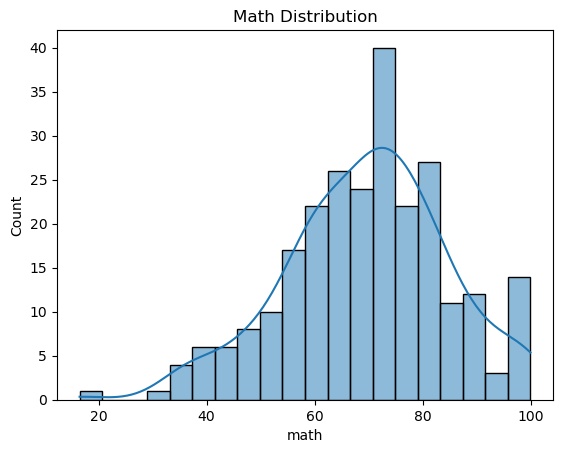

In [16]:
sns.histplot(df["math"], bins=20, kde=True); plt.title("Math Distribution"); plt.show()


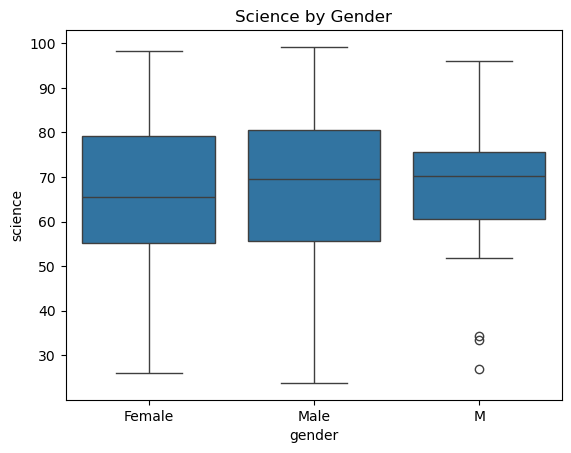

In [17]:
sns.boxplot(x="gender", y="science", data=df); plt.title("Science by Gender"); plt.show()


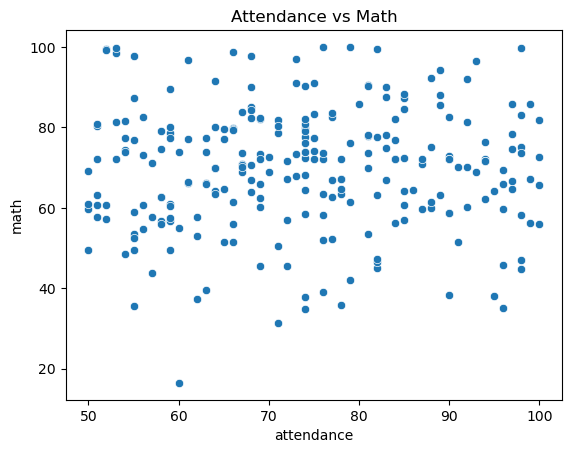

In [18]:
sns.scatterplot(x="attendance", y="math", data=df); plt.title("Attendance vs Math"); plt.show()


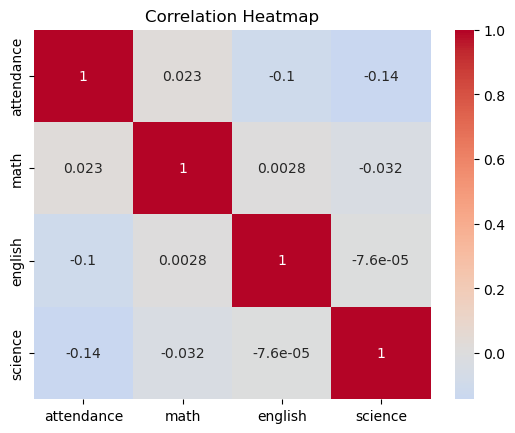

In [19]:
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0); plt.title("Correlation Heatmap"); plt.show()


In [20]:
df.to_csv("outputs/cleaned_students.csv", index=False)


In [21]:
Kpis = {
"avg_math": avg_math,
"avg_english": avg_english,
"avg_science": avg_science,
"avg_attendance": avg_attendance

}
pd.DataFrame([Kpis]).to_csv("outputs/students_kpis.csv", index=False)